In [1]:
import pandas as pd
import sqlalchemy as sql
import matplotlib.pyplot as plt
db = sql.create_engine("postgresql:///dweikert")
resdf = pd.read_sql('results',db)

#print(resdf)

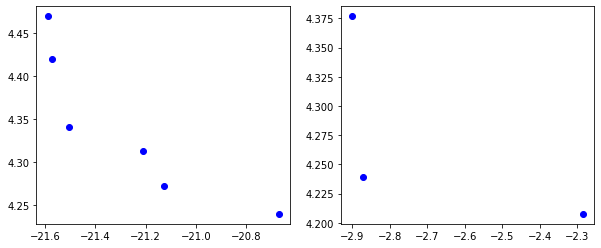

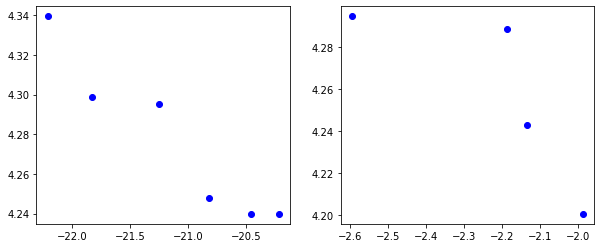

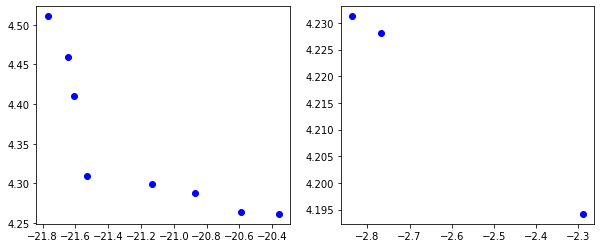

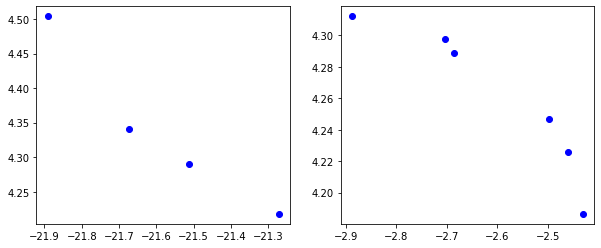

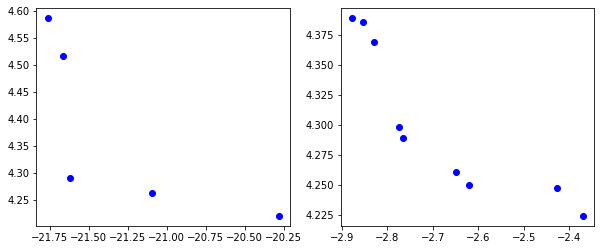

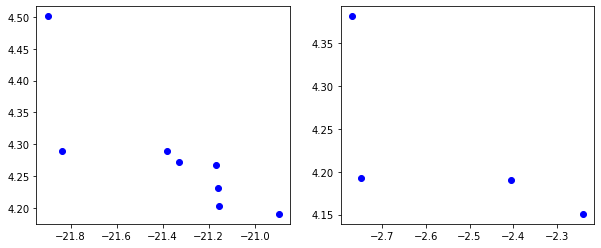

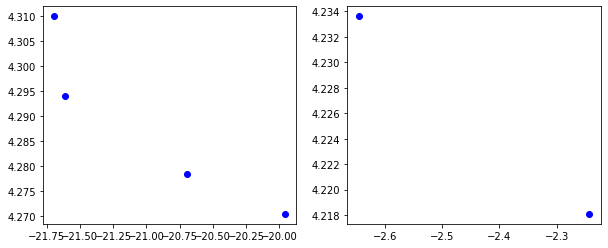

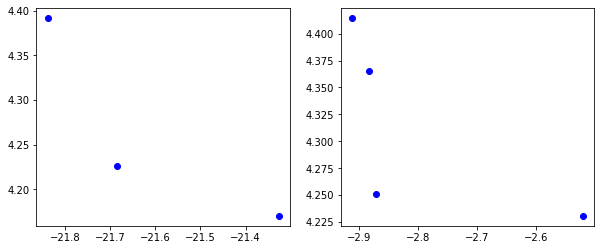

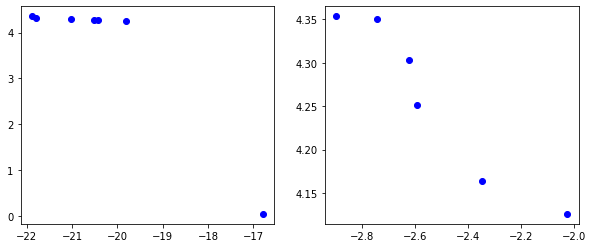

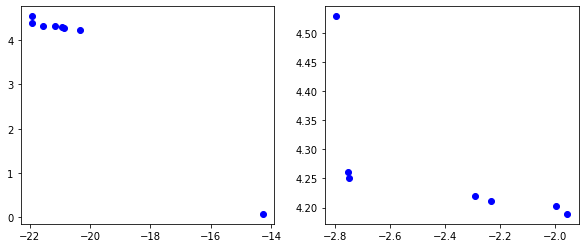

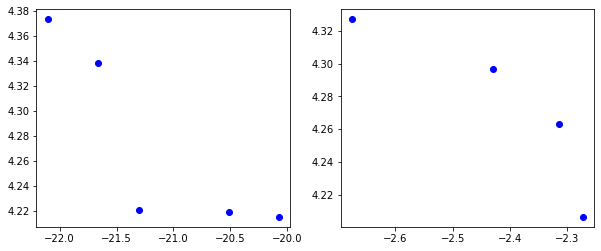

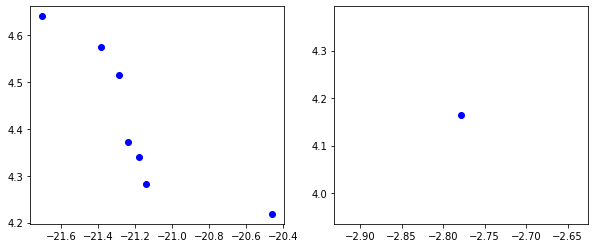

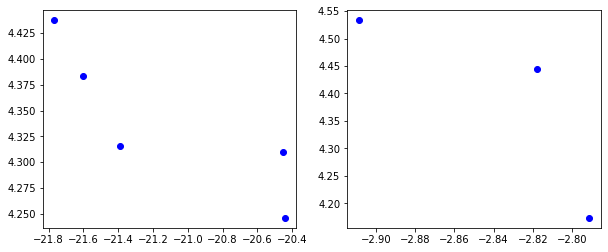

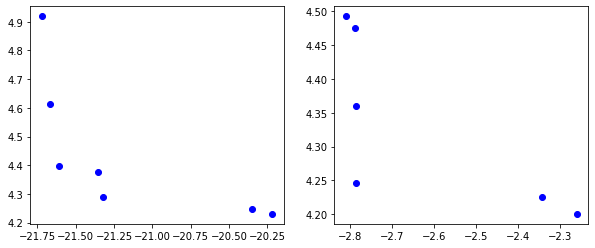

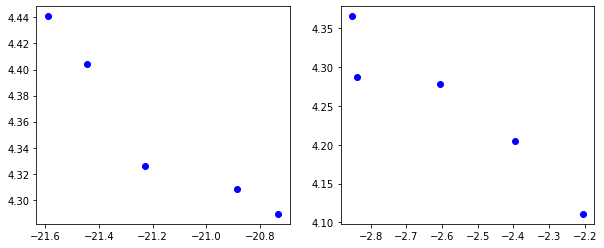

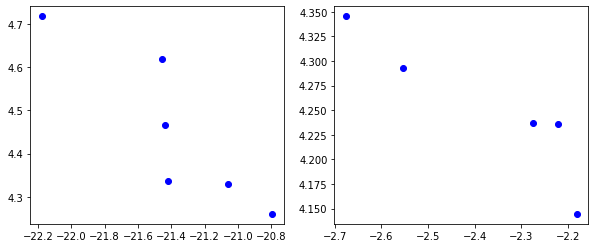

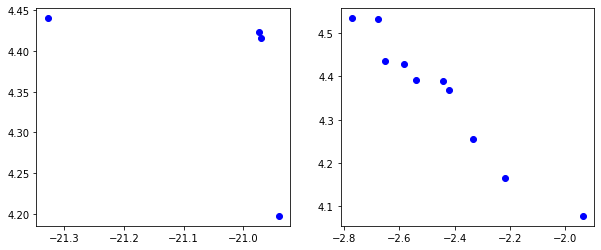

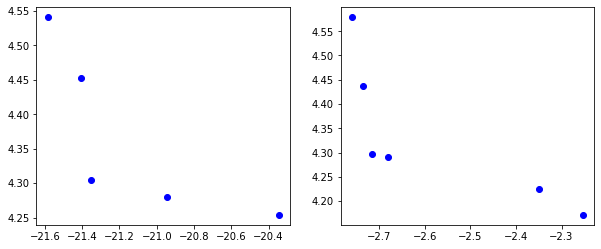

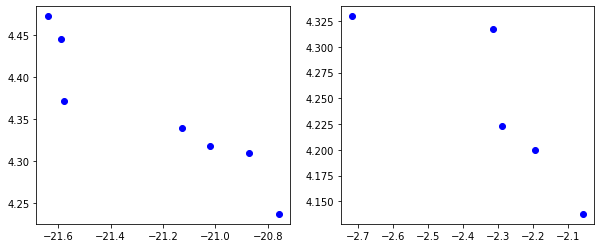

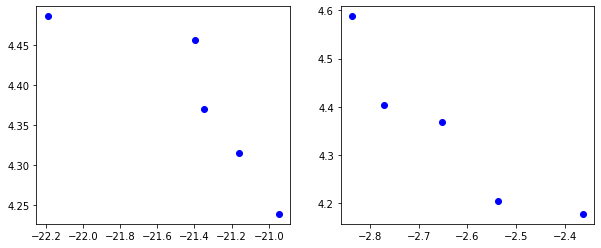

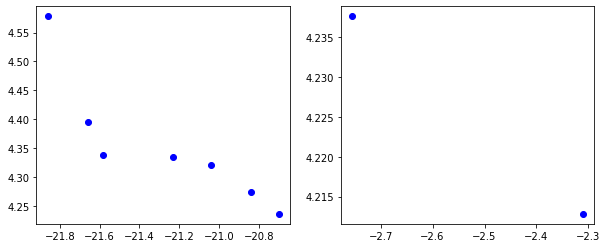

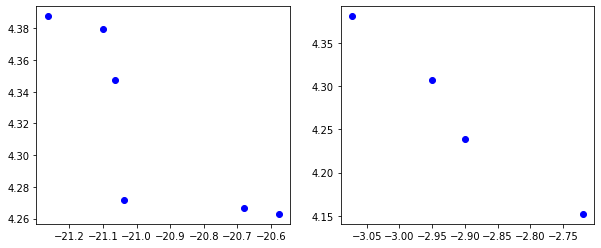

In [2]:
%matplotlib inline
#printing fronts
import pickle as pck
from deap import creator, base
from individual import ListWithAttributes

import numpy as np
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))
    creator.create("Individual", ListWithAttributes, fitness=creator.FitnessMin)

#resdf.set_index('index', inplace=True)
fronts = resdf['front']
fronts = [pck.loads(x) for x in fronts]
for experiment_run in fronts:
    fig, axes = plt.subplots(1,len(experiment_run), figsize=(10,4))
    i=0
    for front in experiment_run: 
        front = [x for x in front if x.fitness.values[1]<9999]
        obj = np.array([ind.fitness.values for ind in front])
        axes[i].scatter(obj[:,0], obj[:,1]/1000, c='b')
        i+=1
    plt.show()